# notebook outline

In this notebook, I analyze the upvote ratio and word count of the dataset by label. I find that none of the word counts and upvote ratios are from the same distribution across categories, meaning that they are distinctly different. Additionally:

NTA posts are the highest upvoted


NTA posts are statistcally longer than YTA posts

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("final_cleaned_df.csv")

# analyzing upvote ratio of dataset

In [3]:
hist, bin_edges = np.histogram(df.upvote_ratio)

In [4]:
hist

array([   98,   357,  3040,  3330,  5516, 10054, 16588, 20915, 29351,
       38713], dtype=int64)

In [6]:
import matplotlib.pyplot as plt

def make_histogram(feature):
    
    
    n, bins, patches = plt.hist(x=feature, bins='auto',
                            alpha=0.7, rwidth=0.85)
    plt.grid(axis='y', alpha=0.75)
#     plt.xlabel(feature_name)
    plt.ylabel('Post Count')
#     plt.title(feature_name + ' of Dataset')
    maxfreq = n.max()


    plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
    
# def make_boxplot(feature):
    

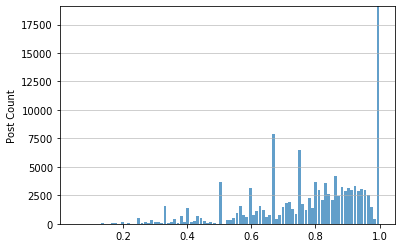

In [7]:
make_histogram(df.upvote_ratio)

# most posts are highly upvoted

In [8]:
NTA = df[df.label == "Not the A-hole"]
YTA = df[df.label == "Asshole"]
ESH = df[df.label == "Everyone Sucks"]
NAH = df[df.label == "No A-holes here"]

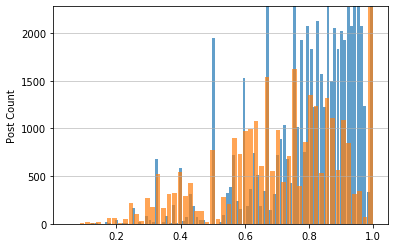

In [9]:
make_histogram(NTA.upvote_ratio)
make_histogram(YTA.upvote_ratio)

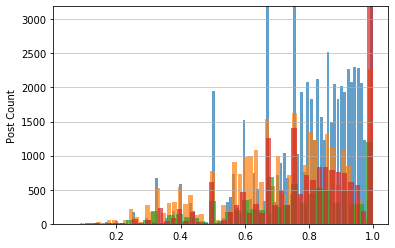

In [10]:
make_histogram(NTA.upvote_ratio) #blue
make_histogram(YTA.upvote_ratio) #orange
make_histogram(ESH.upvote_ratio) #green
make_histogram(NAH.upvote_ratio) #red

#nta looks higher

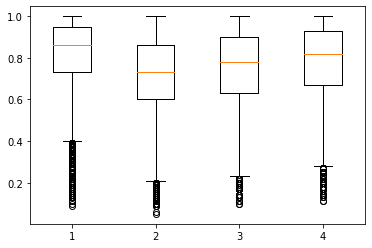

In [70]:
data = [NTA.upvote_ratio, YTA.upvote_ratio, ESH.upvote_ratio, NAH.upvote_ratio]
fig, ax = plt.subplots()
ax.boxplot(data)

plt.show()

#again, nta looks higher

In [71]:
for i in data:
    print(np.mean(i))
    
# NTA is highest upvoted on average

0.8187814171213306
0.7088296203325879
0.7485297919849645
0.7913747613261544


In [12]:
np.array(df.upvote_ratio).max()

1.0

In [13]:
np.array(df.upvote_ratio).min()

0.05

In [23]:
import scipy.stats

skew test of upvote_ratio

In [29]:
print(scipy.stats.skew(NTA.upvote_ratio.dropna()))
print(scipy.stats.skew(YTA.upvote_ratio.dropna()))
print(scipy.stats.skew(ESH.upvote_ratio.dropna()))
print(scipy.stats.skew(NAH.upvote_ratio.dropna()))

-1.047663085197483
-0.5505581066178694
-0.6652785306802571
-0.8684480597613016


skew test of upvote_ratio with outliers removed

In [31]:
def reject_outliers(data, m = 2.):
    d = np.abs(data - np.median(data))
    mdev = np.median(d)
    s = d/mdev if mdev else 0.
    return data[s<m]

In [33]:
print(scipy.stats.skew(reject_outliers(NTA.upvote_ratio.dropna())))
print(scipy.stats.skew(reject_outliers(YTA.upvote_ratio.dropna())))
print(scipy.stats.skew(reject_outliers(ESH.upvote_ratio.dropna())))
print(scipy.stats.skew(reject_outliers(NAH.upvote_ratio.dropna())))

-0.37756220721968736
-0.11823980577424861
-0.13900205836260446
-0.23591018503568673


ks test for normality

In [57]:
print(scipy.stats.kstest(NTA.upvote_ratio.dropna(),'norm'))
print(scipy.stats.kstest(YTA.upvote_ratio.dropna(),'norm'))
print(scipy.stats.kstest(ESH.upvote_ratio.dropna(),'norm'))
print(scipy.stats.kstest(NAH.upvote_ratio.dropna(),'norm'))

KstestResult(statistic=0.6538911901648373, pvalue=0.0)
KstestResult(statistic=0.5931735672149845, pvalue=0.0)
KstestResult(statistic=0.6056779716965591, pvalue=0.0)
KstestResult(statistic=0.6313455834171595, pvalue=0.0)


In [43]:
print(scipy.stats.kstest(reject_outliers(NTA.upvote_ratio.dropna()),'norm'))
print(scipy.stats.kstest(reject_outliers(YTA.upvote_ratio.dropna()),'norm'))
print(scipy.stats.kstest(reject_outliers(ESH.upvote_ratio.dropna()),'norm'))
print(scipy.stats.kstest(reject_outliers(NAH.upvote_ratio.dropna()),'norm'))

KstestResult(statistic=0.7424290843210913, pvalue=0.0)
KstestResult(statistic=0.6907077442928811, pvalue=0.0)
KstestResult(statistic=0.7019440346051236, pvalue=0.0)
KstestResult(statistic=0.7229665300719839, pvalue=0.0)


test of whether the sample distributions are equal. p-values are all very small so none are.

In [34]:
scipy.stats.ks_2samp(NTA.upvote_ratio.dropna(),YTA.upvote_ratio.dropna())

Ks_2sampResult(statistic=0.25332316062291516, pvalue=0.0)

In [35]:
scipy.stats.ks_2samp(NTA.upvote_ratio.dropna(),ESH.upvote_ratio.dropna())

Ks_2sampResult(statistic=0.1677589410984407, pvalue=7.682875435639667e-187)

In [36]:
scipy.stats.ks_2samp(NTA.upvote_ratio.dropna(),NAH.upvote_ratio.dropna())

Ks_2sampResult(statistic=0.080699327004982, pvalue=1.4215316532765312e-79)

In [38]:
scipy.stats.ks_2samp(YTA.upvote_ratio.dropna(),ESH.upvote_ratio.dropna())

Ks_2sampResult(statistic=0.09609791662254397, pvalue=4.607464931057726e-53)

In [39]:
scipy.stats.ks_2samp(YTA.upvote_ratio.dropna(),NAH.upvote_ratio.dropna())

Ks_2sampResult(statistic=0.19258447040128468, pvalue=0.0)

In [40]:
scipy.stats.ks_2samp(ESH.upvote_ratio.dropna(),NAH.upvote_ratio.dropna())

Ks_2sampResult(statistic=0.10031852962395948, pvalue=2.8823189112050703e-50)

# analyzing word count of dataset

making the word counter using regular expressions

In [14]:
import re

In [15]:
texts = list(df.text)
wc = []
i=0
for t in texts:
    
    try:
        res = len(re.findall(r'\w+', t)) 
        wc.append(res)
    except:
        wc.append(0)
        
    i+=1

In [16]:
df["word_count"]=wc

In [17]:
df.to_csv("final_cleaned_df.csv")

In [18]:
np.array(wc).max()

5667

In [19]:
np.array(wc).min()

0

histogram of word counts

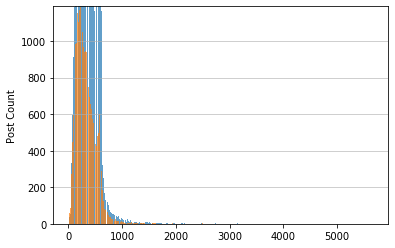

In [21]:
make_histogram(NTA.word_count) #blue
make_histogram(YTA.word_count) #orange

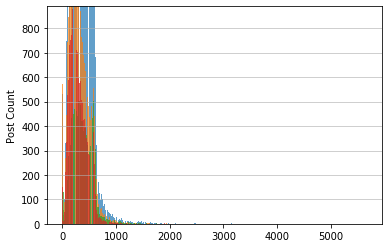

In [57]:
make_histogram(NTA.word_count) #blue
make_histogram(YTA.word_count) #orange
make_histogram(ESH.word_count) #green
make_histogram(NAH.word_count) #red

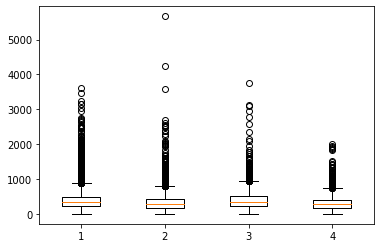

In [22]:
data = [NTA.word_count, YTA.word_count, ESH.word_count, NAH.word_count]
fig, ax = plt.subplots()
ax.boxplot(data)

plt.show()

#again, nta looks higher

In [ ]:
def test_all(test,lst=[NTA.word_count, YTA.word_count, ESH.word_count, NAH.word_count]):
    for i in lst:
        a = test(i)
        print(a)
        
def test_all_no_outliers(test,lst=[NTA.word_count, YTA.word_count, ESH.word_count, NAH.word_count]):
    for i in lst:
        i = reject_outliers(i)
        a = test(i)
        print(a)

In [68]:
test_all(np.mean)

# NTA is second longest on average. Longest are ESH and shortest are NAH. However, NTA is longer than YTA.

357.9938492522487
319.3770874734163
378.0374897167705
305.1397326852977


skew

In [53]:
test_all(scipy.stats.skew)

1.888943876071711
2.741636281324694
2.6303352766768096
1.1658072911818804


In [54]:
test_all_no_outliers(scipy.stats.skew)

0.1960197970874352
0.24774358260130022
0.10195285097571355
0.2758356368533747


ks test for normality

In [56]:
def test_all_norm (test,lst=[NTA.word_count, YTA.word_count, ESH.word_count, NAH.word_count]):
    for i in lst:
        a = test(i,'norm')
        print(a)
        
def test_all_no_outliers_norm(test,lst=[NTA.word_count, YTA.word_count, ESH.word_count, NAH.word_count]):
    for i in lst:
        i = reject_outliers(i)
        a = test(i,'norm')
        print(a)

In [58]:
test_all_norm(scipy.stats.kstest)

KstestResult(statistic=0.9929372397136356, pvalue=0.0)
KstestResult(statistic=0.9808943199098059, pvalue=0.0)
KstestResult(statistic=0.9852780008700485, pvalue=0.0)
KstestResult(statistic=0.9916102518630333, pvalue=0.0)


In [59]:
test_all_no_outliers_norm(scipy.stats.kstest)

KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)


ks two sample test for distribution identical-ness

In [60]:
scipy.stats.ks_2samp(NTA.word_count.dropna(),YTA.word_count.dropna())

Ks_2sampResult(statistic=0.09572698307477012, pvalue=1.2384107865927538e-164)

In [61]:
scipy.stats.ks_2samp(NTA.word_count.dropna(),ESH.word_count.dropna())

Ks_2sampResult(statistic=0.04779097841126828, pvalue=1.4869560385400923e-15)

In [62]:
scipy.stats.ks_2samp(NTA.word_count.dropna(),NAH.word_count.dropna())

Ks_2sampResult(statistic=0.12857119023920066, pvalue=2.4937976138724858e-201)

In [63]:
scipy.stats.ks_2samp(YTA.word_count.dropna(),ESH.word_count.dropna())

Ks_2sampResult(statistic=0.14076084833723723, pvalue=2.318637634227899e-113)

In [65]:
scipy.stats.ks_2samp(YTA.word_count.dropna(),NAH.word_count.dropna())

Ks_2sampResult(statistic=0.034822656650929984, pvalue=8.74780803621378e-12)

In [66]:
scipy.stats.ks_2samp(ESH.word_count.dropna(),NAH.word_count.dropna())

Ks_2sampResult(statistic=0.17484177846224636, pvalue=8.016679501348754e-152)